# Building A Handwritten Digits Classifier

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

In [1]:
# The load_digits() function returns a copy of the hand-written digits dataset from UCI

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
digits_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# digits_data is a dictionary

digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
labels = pd.Series(digits_data['target'])

labels

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int64

In [5]:
data = pd.DataFrame(digits_data["data"])

data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
# use matplotlib to visualise some of the images in the dataset.

first_image = data.iloc[0]

np_image = first_image.values
np_image = np_image.reshape(8,8)

np_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

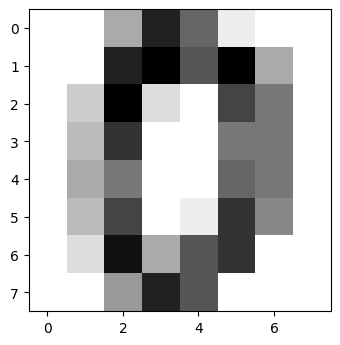

In [7]:
plt.imshow(np_image, cmap='gray_r')

(-0.5, 7.5, 7.5, -0.5)

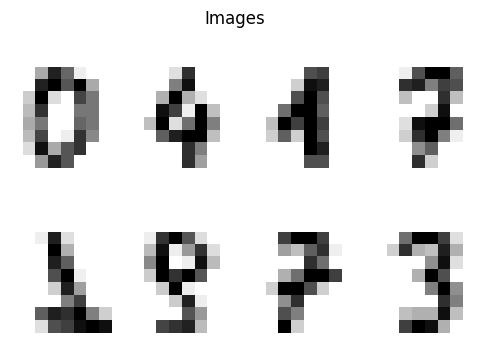

In [8]:
# Generate a scatter plot grid, with 2 rows and 4 columns.

fig, axs = plt.subplots(2, 4)
fig.suptitle('Images')

axs[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axs[0,1].imshow(data.iloc[100].values.reshape(8,8), cmap = 'gray_r')
axs[0,2].imshow(data.iloc[200].values.reshape(8,8), cmap = 'gray_r')
axs[0,3].imshow(data.iloc[300].values.reshape(8,8), cmap = 'gray_r')

axs[1,0].imshow(data.iloc[1000].values.reshape(8,8), cmap = 'gray_r')
axs[1,1].imshow(data.iloc[1100].values.reshape(8,8), cmap = 'gray_r')
axs[1,2].imshow(data.iloc[1200].values.reshape(8,8), cmap = 'gray_r')
axs[1,3].imshow(data.iloc[1300].values.reshape(8,8), cmap = 'gray_r')


axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,2].axis("off")
axs[0,3].axis("off")

axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,2].axis("off")
axs[1,3].axis("off")

# K-Nearest Neighbors Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Write a function named train() that uses 
# KNeighborsClassifer for training k-nearest neighbors models.

def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors= nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits= 4, random_state= 2, shuffle = True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        

In [16]:
knn_3 = cross_validate(3)
np.mean(knn_3)

0.9872011878247959

In [13]:
knn_5 = cross_validate(5)
np.mean(knn_5)

0.9849777282850779

In [22]:
nums = list(range(1,11))

acc = []

for num in nums:
    knn_num = cross_validate(num)
    mean_num = np.mean(knn_num)
    acc.append(mean_num)

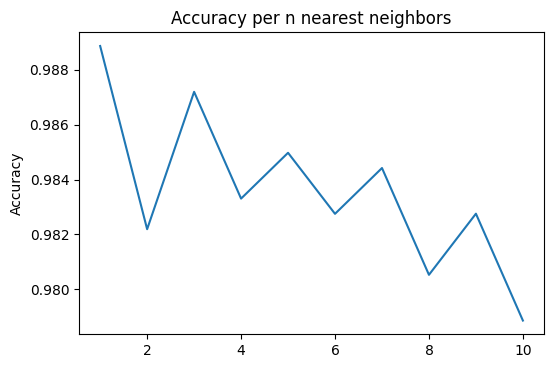

In [24]:
plt.plot(nums, acc)
plt.title('Accuracy per n nearest neighbors')
plt.ylabel('Accuracy')
plt.show()

There are a few downsides to using k-nearest neighbors: 
* High memory usage (for each new unseen observation, many comparisons need to be made to seen observations) 
* No model representation to debug and explore

# Neural Network with One Hidden Layer

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def nn_train(train_features, train_target, n):
    mlp = MLPClassifier(hidden_layer_sizes= (n,), activation = 'logistic', solver = 'adam')
    mlp.fit(train_features, train_target)
    return mlp

def nn_test(model, test_features, test_target):
    predictions = model.predict(test_features) 
    train_test_df = pd.DataFrame()
    train_test_df['actual'] = test_target
    train_test_df['predicted'] = predictions
    overall_accuracy = sum(train_test_df["predicted"] == train_test_df["actual"])/len(train_test_df)    
    return overall_accuracy
    
def nn_cross_validate(features, target, n):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = labels.loc[train_index], labels.loc[test_index]
        model = nn_train(train_features, train_target, n)
        overall_accuracy = nn_test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

    

In [59]:
nn_8 = nn_cross_validate(data, labels, 8)
np.mean(nn_8)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9065429349170997

In [57]:
size = [8,16,32,64,128,256]

nn_acc = []

for n in size:
    accuracy = cross_validate(data, labels, n)
    mean_acc = np.mean(accuracy)
    nn_acc.append(mean_acc)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

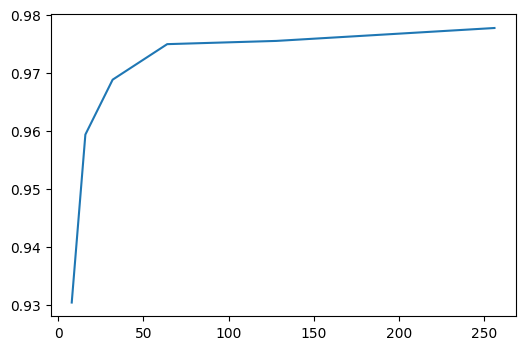

In [49]:
plt.plot(size, nn_acc)
plt.show()

### Summary

It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.



# Two Hidden Layers

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def nn_train(train_features, train_target, n):
    mlp = MLPClassifier(hidden_layer_sizes= (n,n,), activation = 'logistic', solver = 'adam')
    mlp.fit(train_features, train_target)
    return mlp

def nn_test(model, test_features, test_target):
    predictions = model.predict(test_features) 
    train_test_df = pd.DataFrame()
    train_test_df['actual'] = test_target
    train_test_df['predicted'] = predictions
    overall_accuracy = sum(train_test_df["predicted"] == train_test_df["actual"])/len(train_test_df)    
    return overall_accuracy
    
def nn_cross_validate(features, target, n):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = labels.loc[train_index], labels.loc[test_index]
        model = nn_train(train_features, train_target, n)
        overall_accuracy = nn_test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

    

In [ ]:
two_layers = [64, 128, 256]
nn_two_accuracies = []

for n in two_layers:
    nn_accuracies = cross_validate(data, labels, n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")
plt.plot(two_laters, nn_two_accuracies)

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



### Summary

Using 2 hidden layers improved our simple accuracy to 98%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.